In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir(".."))

['test_RUL_FD001_100x50.json', 'train_RUL_FD001_100x50.json', '.DS_Store', 'models', 'test_FD001_100x50.json', 'X_train_HPCC_1_20.json', 'preprocessing', 'train_FD001_100x50.json', 'X_test_HPCC_1_20.json', 'y_test_HPCC_1_20.json', 'y_train_HPCC_1_20.json']


In [54]:
import json
with open("service1906_1506.json") as of:
    data = json.load(of)

In [55]:
computes = [c for c in data.keys() if c!="timespan"]
variables = [v for v in data[computes[0]] if v!='index' and v!='arrJob_scheduling']

In [56]:
#Check empty array
def getEmptyArr(data, c):
    cObj = data[c]
    cDf = pd.DataFrame()
    cDf['compute'] = [c for _ in data['timespan']]
    cDf['timespan'] = data['timespan']
    for v in variables:
        vArr = np.array(cObj[v])
        if len(vArr)==0:
            print('c=', c)
            print('v=', v)
for c in computes:
    getEmptyArr(data, c)

c= compute-1-26
v= arrTemperature


In [57]:
def addTarget(cDf, predictedVar, predictedStep):
    cDf[target] = cDf[predictedVar].shift(-predictedStep)
    cDf.dropna(inplace=True)

In [58]:
def getComputeDf(data, c, predictedVar, predictedStep):
    cObj = data[c]
    cDf = pd.DataFrame()
    cDf['compute'] = [c for _ in data['timespan']]
    cDf['timespan'] = data['timespan']
    for v in variables:
        vArr = np.array(cObj[v])
        if len(vArr)==0:
            return None
        else:
            for i in range(len(vArr[0])):
                cDf[v+str(i)] = vArr[:, i]
    cDf['timespan'] = pd.to_datetime(cDf['timespan'])
    print(predictedVar)
    addTarget(cDf, predictedVar, predictedStep)
    return cDf

In [59]:
predictedVar = 'arrTemperature0'
target = predictedVar + "_target"
predictedSteps = 4
df = pd.concat([x for x in [getComputeDf(data, c, predictedVar, predictedSteps) for c in computes] if type(x)!="NoneType"])

arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTempe

In [33]:
df = df.reset_index().drop('index', axis=1)

print(df.head(50))

        compute                  timespan arrTemperature0 arrTemperature1  \
0   compute-1-1 2019-06-09 00:00:00+00:00              73              59   
1   compute-1-1 2019-06-09 00:05:00+00:00              73              59   
2   compute-1-1 2019-06-09 00:10:00+00:00              73              59   
3   compute-1-1 2019-06-09 00:15:00+00:00              73              59   
4   compute-1-1 2019-06-09 00:20:00+00:00              73              59   
5   compute-1-1 2019-06-09 00:25:00+00:00              73              60   
6   compute-1-1 2019-06-09 00:30:00+00:00              73              59   
7   compute-1-1 2019-06-09 00:35:00+00:00              73              59   
8   compute-1-1 2019-06-09 00:40:00+00:00              73              59   
9   compute-1-1 2019-06-09 00:45:00+00:00              73              59   
10  compute-1-1 2019-06-09 00:50:00+00:00              73              59   
11  compute-1-1 2019-06-09 00:55:00+00:00              73              59   

In [34]:
features = [x for x in df.columns if x not in ['compute', 'timespan', 'arrTemperature0_target']]

In [35]:
features

['arrTemperature0',
 'arrTemperature1',
 'arrTemperature2',
 'arrCPU_load0',
 'arrMemory_usage0',
 'arrFans_health0',
 'arrFans_health1',
 'arrFans_health2',
 'arrFans_health3',
 'arrPower_usage0']

# Plot and see data distribution

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
def plotAttrDataOfId(data, compute, features):
    plt.figure(figsize=(30, 20))
    for i, v in enumerate(features):
        plt.subplot(10, 3, i+1)
        cDf = df[df['compute']==compute]
        plt.plot(cDf['timespan'], cDf[v])
        plt.title(v)
        plt.tight_layout()

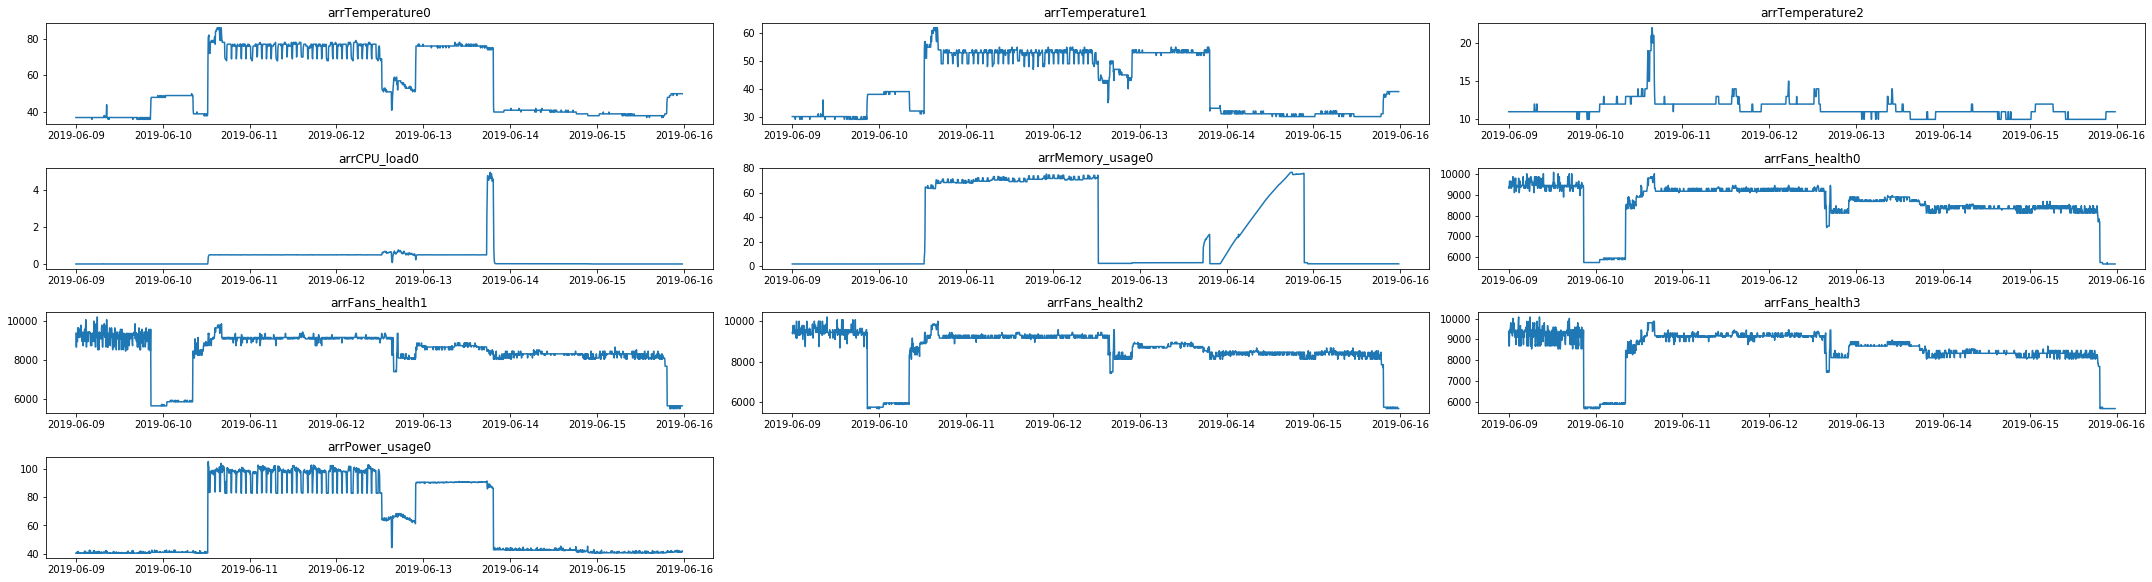

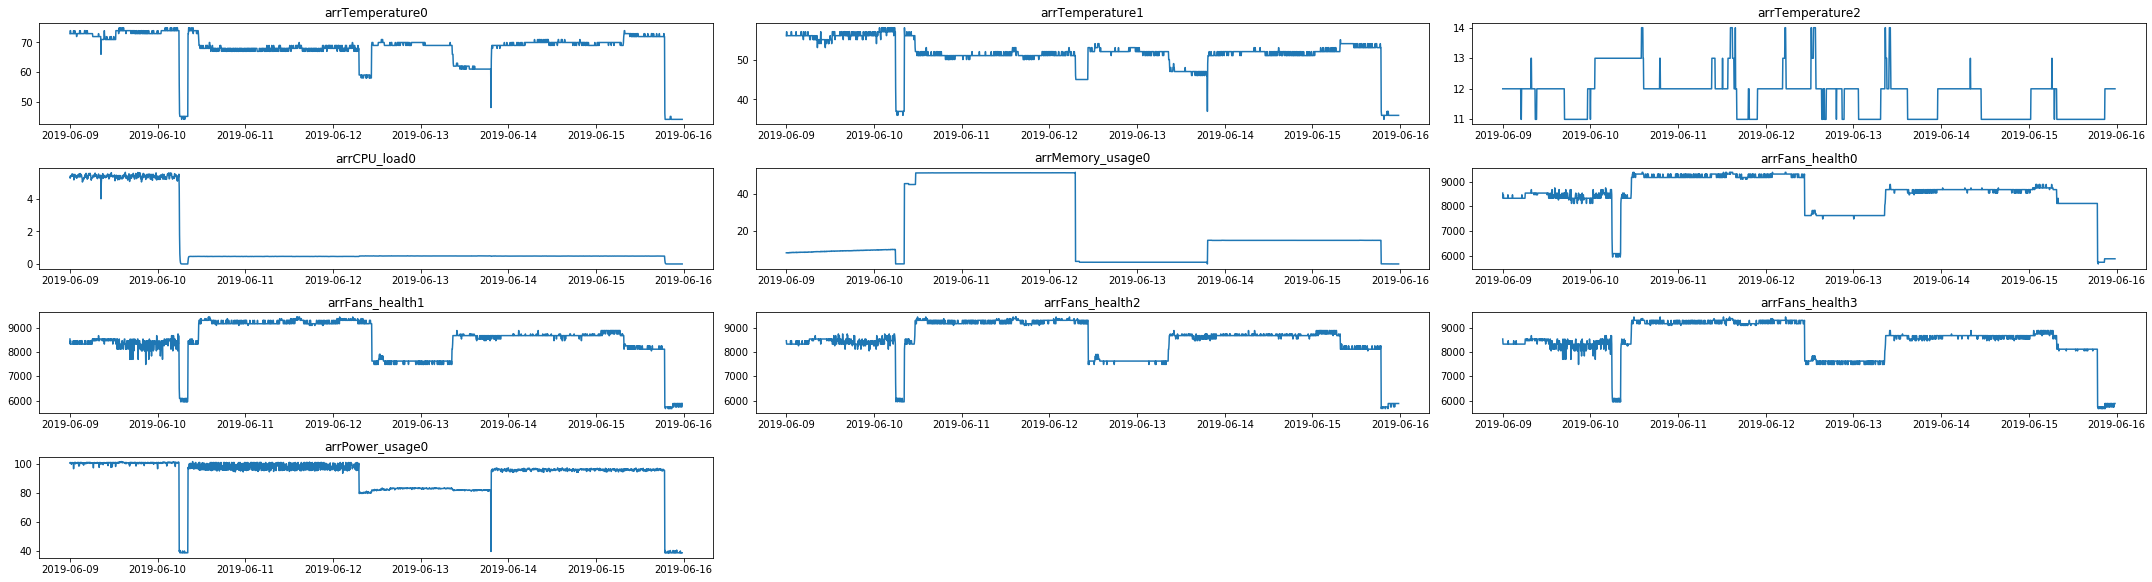

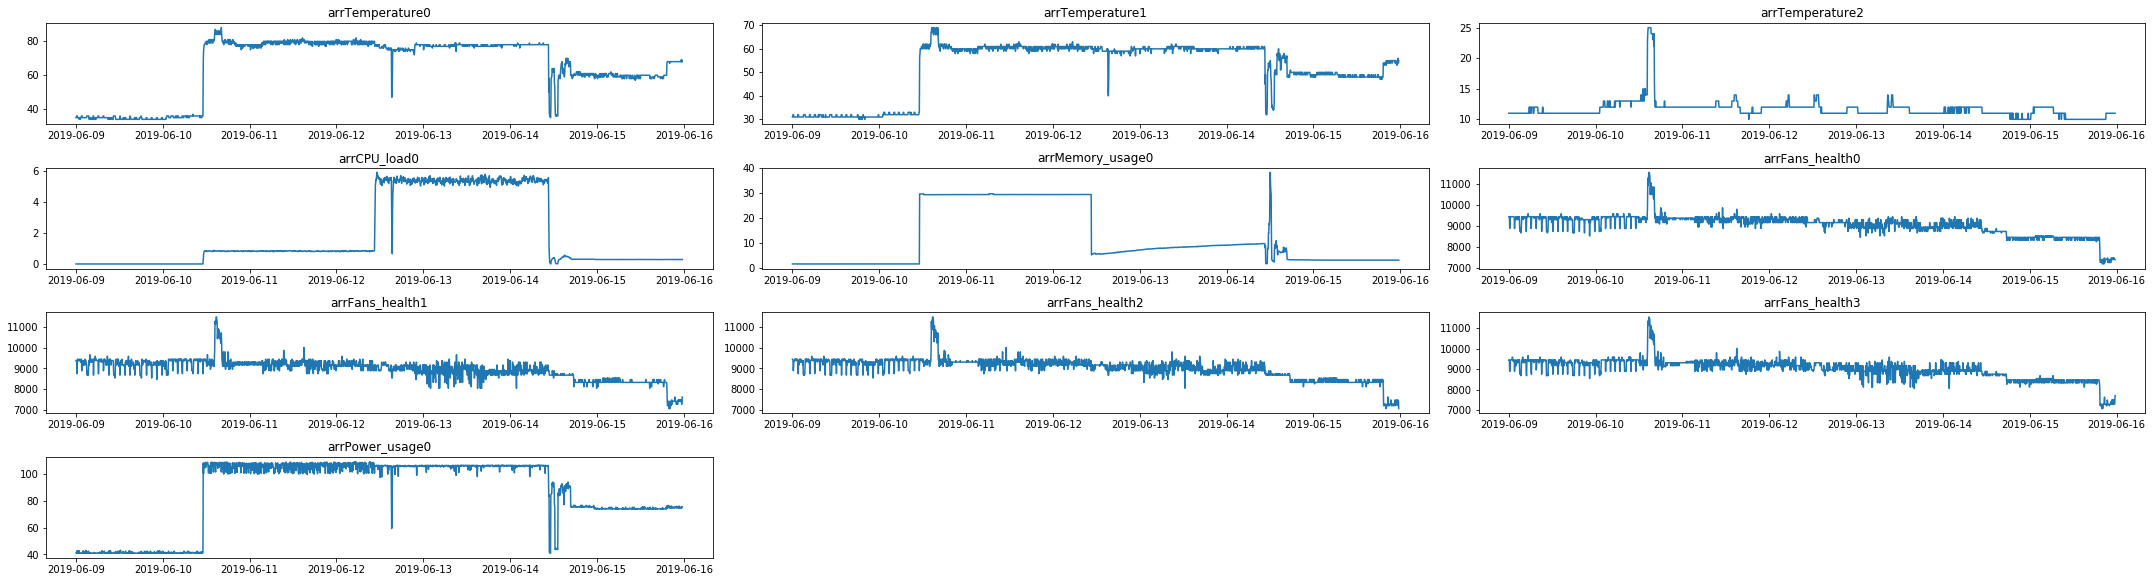

In [38]:
for x in np.random.randint(0, len(computes), 3):
    plotAttrDataOfId(df, computes[x], features)

In [39]:
def plotDataDistribution(data, features):
    plt.figure(figsize=(30, 10))
    for i, v in enumerate(features):
        plt.subplot(3, 10, i+1)
        sns.distplot(list(data[v].values))
        plt.title(v)
    plt.tight_layout()

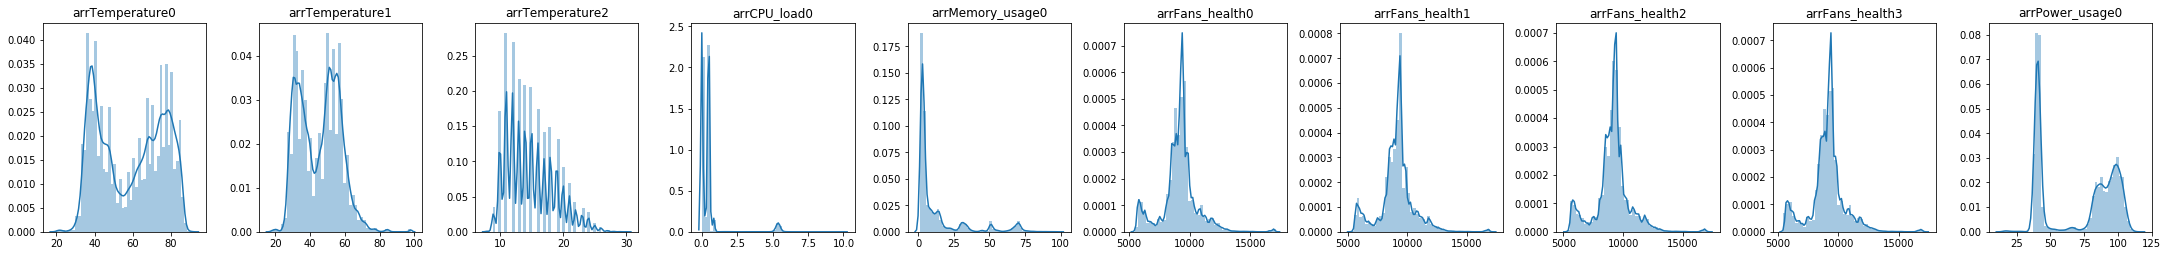

In [40]:
plotDataDistribution(df, features)

# Generate sequences
May need to fill forward (time sampling)

In [76]:
X_dfs = []
y = []
numberOfSequences = 1
sequenceSteps = 20
# generate training data.
for compute in computes:
    cDf = df[df['compute']==compute]
    if(len(cDf) > sequenceSteps):
        randSteps = np.random.randint(0, len(cDf)-sequenceSteps, numberOfSequences)
        for randStep in randSteps:
            X_dfs.append(cDf.iloc[randStep:randStep+sequenceSteps])
            y.append(X_dfs[-1][target].values[-1])

In [42]:
from sklearn.model_selection import train_test_split
X_train_dfs, X_test_dfs, y_train, y_test = train_test_split(X_dfs, y, test_size=0.33)

# Scale

In [43]:
# combine the training data to create a scaler
train_dfs = pd.concat(X_train_dfs)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_dfs[features].values)

In [45]:
X_train = np.array([scaler.transform(item[features].values) for item in X_train_dfs])
X_test = np.array([scaler.transform(item[features].values) for item in X_test_dfs])

In [46]:
y_train = np.array(y_train)
y_test = np.array(y_test)

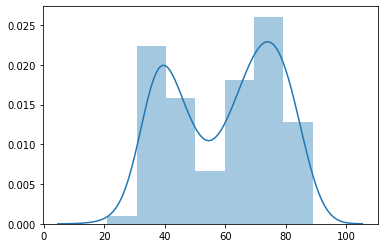

In [47]:
sns.distplot(y_train)

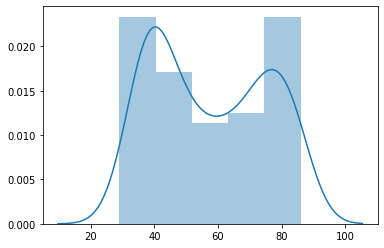

In [48]:
sns.distplot(y_test)

In [49]:
print (y_train)

[47 65 51 40 83 72 38 63 38 78 32 67 77 50 46 41 46 33 82 71 76 56 43 83
 48 75 67 54 44 38 84 60 68 52 73 44 48 78 31 37 78 44 66 82 78 66 73 71
 75 79 53 83 80 69 37 83 75 72 85 78 89 64 82 87 62 64 39 81 78 40 42 48
 59 83 38 57 35 37 83 39 76 81 47 64 35 28 68 37 37 68 76 69 75 46 77 37
 39 73 35 35 73 65 38 69 41 65 74 37 43 52 81 85 71 68 85 42 40 75 36 39
 60 80 63 78 68 40 71 73 39 73 69 60 62 60 75 39 53 38 60 37 70 72 30 62
 64 70 48 81 86 69 67 48 68 49 62 46 69 40 85 86 36 84 59 45 37 39 37 68
 35 87 80 66 41 81 40 73 74 75 53 62 82 80 59 61 43 43 55 76 77 79 68 75
 41 77 66 40 70 45 38 32 45 77 41 59 71 80 84 66 83 37 79 74 38 41 38 61
 71 79 78 74 80 64 76 50 78 38 66 70 38 73 62 37 36 31 35 58 67 21 82 36
 72 57 31 35 39 78 73 77 35 79 56 71 38 56 78 73 48 68 70 49 48 31 63 49
 74 85 60 35 74 56 71 52 39 71 78 38 72 75 47 40 36 48 35 60 42 78 79 42
 43 44 84 71 47 69 73 83 32 42 64 66 48 83 77 78 34 73 49 68 39 48 36 41]


# Export data

In [ ]:
from IPython.display import FileLink

In [ ]:
import codecs, json

In [ ]:
def exportNPArrayToJson(a, fileName):
    b = a.tolist()
    json.dump(b, codecs.open(fileName, 'w', encoding='utf-8'))

In [ ]:
exportNPArrayToJson(X_train, 'X_train_HPCC_1_20.json')
exportNPArrayToJson(X_test, 'X_test_HPCC_1_20.json')
exportNPArrayToJson(y_train, 'y_train_HPCC_1_20.json')
exportNPArrayToJson(y_test, 'y_test_HPCC_1_20.json')

In [ ]:
FileLink('X_train_HPCC_1_20.json')

In [ ]:
FileLink('X_test_HPCC_1_20.json')

In [ ]:
FileLink('y_train_HPCC_1_20.json')

In [ ]:
FileLink('y_test_HPCC_1_20.json')

In [63]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten

# from keras import backend as K
# K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=36, inter_op_parallelism_threads=36)))


def createModel(l1Nodes, l2Nodes, d1Nodes, d2Nodes, inputShape):
    # input layer
    lstm1 = LSTM(l1Nodes, input_shape=inputShape, return_sequences=True, kernel_regularizer=regularizers.l2(0.1))
    do1 = Dropout(0.2)
    
    lstm2 = LSTM(l2Nodes, return_sequences=True, kernel_regularizer=regularizers.l2(0.1))
    do2 = Dropout(0.2)
    
    flatten = Flatten()
    
    dense1 = Dense(d1Nodes, activation='relu')
    do3 = Dropout(0.2)
    
    dense2 = Dense(d2Nodes, activation='relu')
    do4 = Dropout(0.2)
    
    # output layer
    outL = Dense(1, activation='relu')
    # combine the layers
#     layers = [lstm1, do1, lstm2, do2, dense1, do3, dense2, do4, outL]
    layers = [lstm1, lstm2, flatten,  dense1, dense2, outL]
    # create the model
    model = Sequential(layers)
    model.compile(optimizer='adam', loss='mse')
    return model

In [64]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model
# ten fold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True)
from keras.models import load_model
msescores = []
counter= 0



for trainIdx, testIdx in kfold.split(X_train, y_train):
    counter = counter + 1
    # create callbacks
    model_path = 'best_model_fold'+str(counter)+'.h5'
    mc = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1)
    # create model
    model = createModel(64, 64, 8, 8, (X_train.shape[1], X_train.shape[2]))
    model.fit(X_train[trainIdx], y_train[trainIdx], validation_data=(X_train[testIdx], y_train[testIdx]), batch_size=32, epochs=40, callbacks=[mc, es])
    # Done load the best model of this fold
    saved_model = load_model(model_path)
    msescores.append({'path': model_path, 'mse': saved_model.evaluate(X_train[testIdx], y_train[testIdx])})

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Train on 193 samples, validate on 119 samples
Epoch 1/40
193/193 [==============================] - 1s 4ms/step - loss: 3827.5708 - val_loss: 3614.1724

Epoch 00001: val_loss improved from inf to 3614.17235, saving model to best_model_fold1.h5
Epoch 2/40
193/193 [==============================] - 0s 591us/step - loss: 3608.8103 - val_loss: 3221.9927

Epoch 00002: val_loss improved from 3614.17235 to 3221.99271, saving model to best_model_fold1.h5
Epoch 3/40
193/193 [==============================] - 0s 592us/step - loss: 3079.2482 - val_loss: 2489.6988

Epoch 00003: val_loss improved from 3221.99271 to 2489.69880, saving model to best_model_fold1.h5
Epoch 4/40
193/193 [==============================] - 0s 579us/step - loss: 2251.5661 - val_loss: 1563.1097

Epoch 00004: val_loss improved from 2489.69880 to 1563.10968, saving model to best_model_fold1.h5
Epoch 5/40
193/193 [==============================] - 0s 562us/step - loss: 1313.6079 - val_loss: 727.1486

Epoch 00005: val_loss impro

211/211 [==============================] - 0s 556us/step - loss: 84.0577 - val_loss: 102.2290

Epoch 00022: val_loss improved from 108.80324 to 102.22901, saving model to best_model_fold2.h5
Epoch 23/40
211/211 [==============================] - 0s 524us/step - loss: 77.7654 - val_loss: 96.4963

Epoch 00023: val_loss improved from 102.22901 to 96.49632, saving model to best_model_fold2.h5
Epoch 24/40
211/211 [==============================] - 0s 527us/step - loss: 73.3394 - val_loss: 91.7280

Epoch 00024: val_loss improved from 96.49632 to 91.72801, saving model to best_model_fold2.h5
Epoch 25/40
211/211 [==============================] - 0s 543us/step - loss: 69.6527 - val_loss: 84.8755

Epoch 00025: val_loss improved from 91.72801 to 84.87546, saving model to best_model_fold2.h5
Epoch 26/40
211/211 [==============================] - 0s 516us/step - loss: 67.0390 - val_loss: 76.4301

Epoch 00026: val_loss improved from 84.87546 to 76.43006, saving model to best_model_fold2.h5
Epoch 27

220/220 [==============================] - 0s 500us/step - loss: 60.5327 - val_loss: 71.3457

Epoch 00022: val_loss improved from 72.47835 to 71.34569, saving model to best_model_fold3.h5
Epoch 23/40
220/220 [==============================] - 0s 485us/step - loss: 59.9260 - val_loss: 72.1440

Epoch 00023: val_loss did not improve from 71.34569
Epoch 24/40
220/220 [==============================] - 0s 542us/step - loss: 56.9606 - val_loss: 72.6917

Epoch 00024: val_loss did not improve from 71.34569
Epoch 25/40
220/220 [==============================] - 0s 500us/step - loss: 56.8321 - val_loss: 69.0530

Epoch 00025: val_loss improved from 71.34569 to 69.05300, saving model to best_model_fold3.h5
Epoch 26/40
220/220 [==============================] - 0s 485us/step - loss: 55.2659 - val_loss: 69.6456

Epoch 00026: val_loss did not improve from 69.05300
Epoch 27/40
220/220 [==============================] - 0s 498us/step - loss: 54.6987 - val_loss: 66.1106

Epoch 00027: val_loss improved f

In [65]:
msescores

[{'path': 'best_model_fold1.h5', 'mse': 86.01180815496365},
 {'path': 'best_model_fold2.h5', 'mse': 48.183990856208425},
 {'path': 'best_model_fold3.h5', 'mse': 59.36354811295219}]

In [66]:
for md in msescores:
    saved_model = load_model(md['path'])
    print(saved_model.evaluate(X_test, y_test))

154/154 [==============================] - 0s 935us/step
101.2348367269937
154/154 [==============================] - 0s 827us/step
44.09907947887074
154/154 [==============================] - 0s 805us/step
52.00018706879059


In [67]:
best_model = load_model(msescores[np.argmin([sc['mse'] for sc in msescores])]['path'])

In [68]:
predicted = saved_model.predict(X_test)

In [69]:
baseline = np.array([df[predictedVar].values[-1] for df in X_test_dfs])

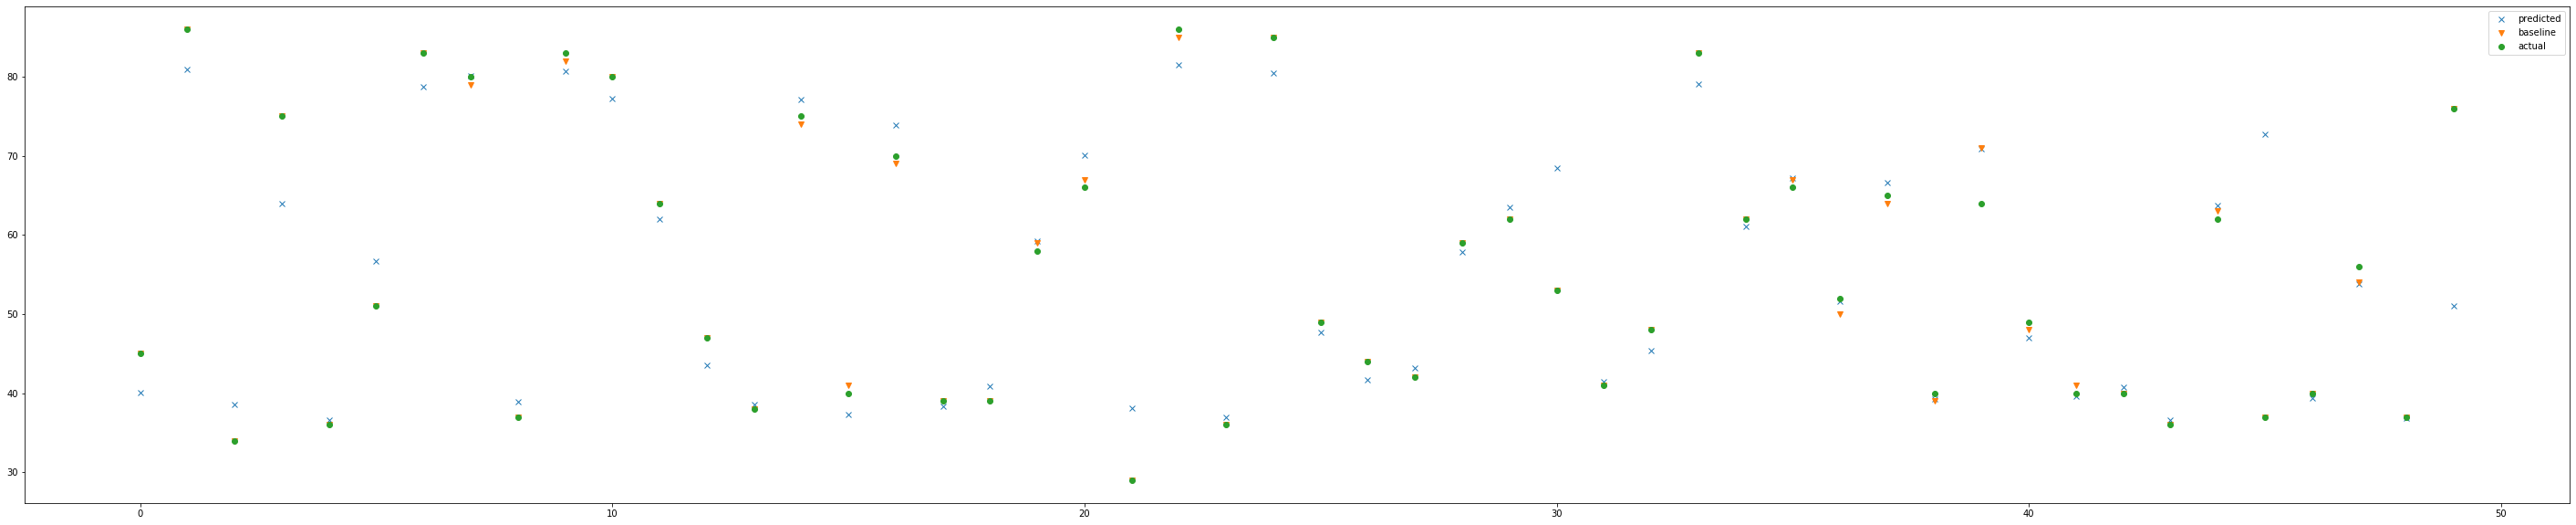

In [70]:
plt.figure(figsize=(50, 10))
plt.plot(range(50), predicted[:50], 'x', label='predicted')
plt.plot(range(50), baseline[:50], 'v', label='baseline')
plt.plot(range(50), y_test[:50], 'o', label='actual')
plt.legend()

In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted)
msebaseline = mean_squared_error(y_test, baseline)

In [72]:
print('mse=', mse)
print('msebaseline=', msebaseline)

mse= 41.889491625810145
msebaseline= 0.7012987012987013


In [73]:
from keras.models import Sequential

In [74]:
model = Sequential()

In [75]:
model.predict_classes

<bound method Sequential.predict_classes of <keras.engine.sequential.Sequential object at 0x1b1ecfed0>>